# Titanic Disaster

In this reboot, we will explore the famous [Titanic](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv) dataset listing all passengers with various properties.

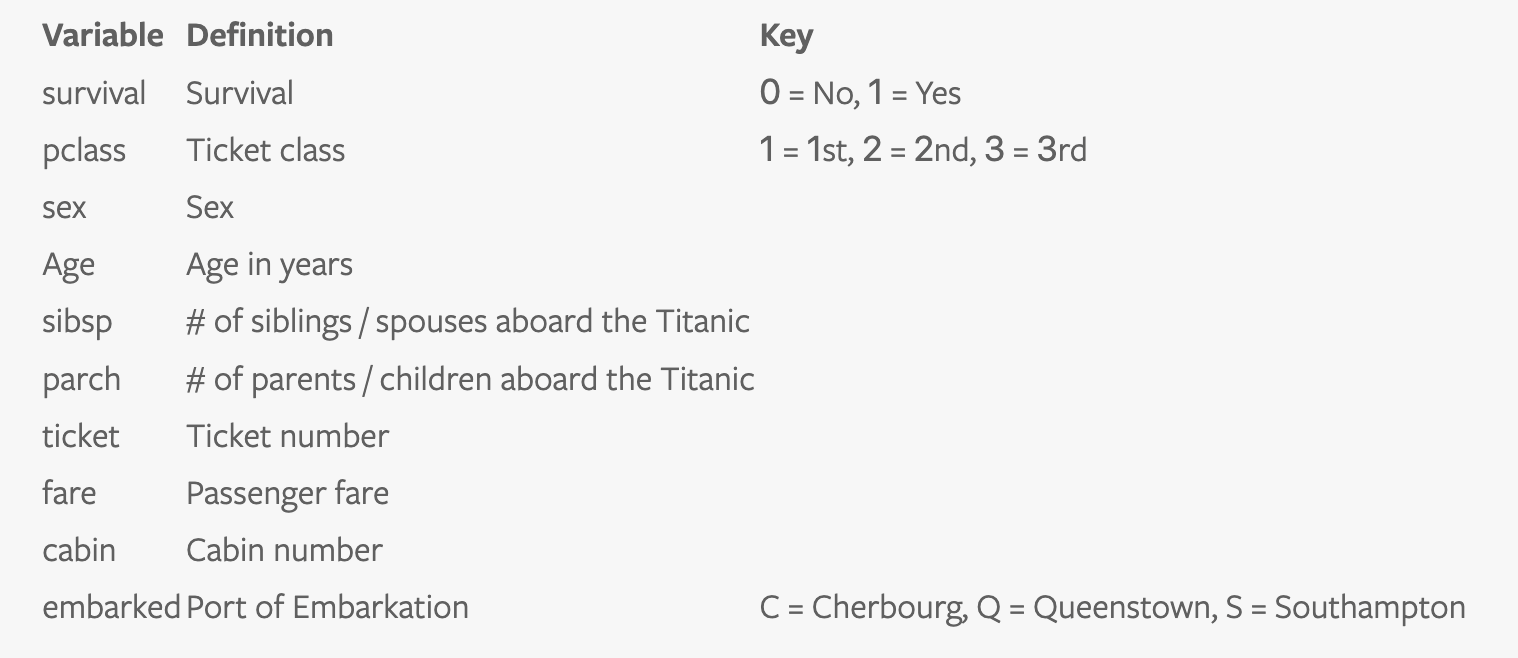

❓ Start loading `matplotlib`, `numpy` and `pandas` the usual way

In [2]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

❓ Load the CSV data as a into a `titanic_df` variable.

the csv file is available at this url: https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv

<details>
    <summary>💡 <strong>Hint</strong> - Click to reveal</summary>
    Try using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html"><code>pandas.DataFrame.read_csv</code></a>
</details>

In [4]:
# !curl "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv"

In [5]:
# YOUR CODE HERE
url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv"
titanic_df = pd.read_csv(url) 
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


❓ Explore the dataset with the usual methods (`shape`, `dtypes`, `describe()`, `info()`, `isnull().sum()`).

Do not hesitate to add cells by pressing `B`.

In [6]:
# YOUR CODE HERE
titanic_df.shape

(891, 12)

In [11]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It seems that the `Cabin` information is missing in 687 rows. Pretty normal considering people in 3rd class (`Pclass`) did not have one!

❓ Use the [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) function to get rid of the `Cabin` in `titanic_df`

In [14]:
# YOUR CODE HERE
titanic_df.drop("Cabin", axis=1, inplace=True)

## Classes Analysis

Let's have a look at the ticket divide.

❓ Using a `groupby()`, create a `pclass_df` dataframe counting the number of tickets sold per class (1, 2 or 3)

In [16]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [22]:
# YOUR CODE HERE
pclass_df = titanic_df.groupby("Pclass")["PassengerId"].count().to_frame(name="Count")

Looking at the number is not very visual, let's try to make sense of the data with a plot.

❓ Plot the `pclass_df` dataframe built in the previous question as a barchart

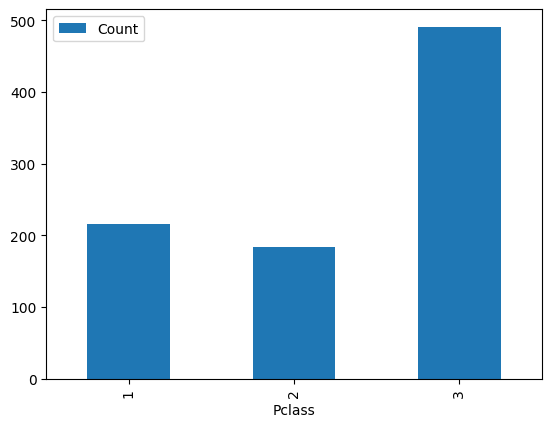

In [24]:
# YOUR CODE HERE
pclass_df.plot(kind="bar");

Let's now have a look at **survivors**.

❓ Plot a barchart of *frequency of survivals* per class. `0` means no one survived in the class, `1` means everyone survived.

In [25]:
# YOUR CODE HERE
titanic_df.groupby("Pclass")[["Survived"]].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### Gender Analysis

Let's have a look at the `Sex` column.

❓ Use the [`pandas.Series.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) function to check the different values used in that column

In [26]:
# YOUR CODE HERE
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

❓ Plot a barchart of survival frequency of each gender. Who survived the most?

In [34]:
# YOUR CODE HERE
titanic_df.groupby("Sex")[["Survived"]].mean()

,Survived
Sex,
female,0.742038
male,0.188908


Let's build a fancier histogram where we show the total number of passengers + the total number of survivors (for each gender).

❓ Build a `survivors_df` DataFrame with two columns: `Total` and `Survived`, and two rows (`male` and `female`). Plot it.

In [36]:
# YOUR CODE HERE
survivors_df = titanic_df.groupby("Sex")[["Survived"]].sum()
survivors_df["Total"] = titanic_df.groupby("Sex")[["PassengerId"]].count()

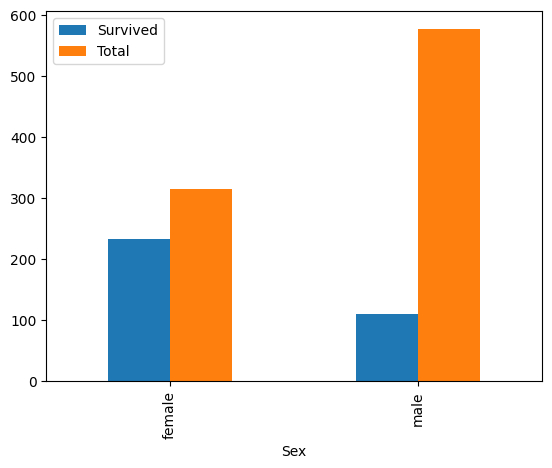

In [39]:
survivors_df.plot(kind="bar");

## Children

The former analysis did not take into account ages. We want to differentiate between a child and an adult and see how survival rates are affected.

❓ Use boolean indexing to create a `children_df` containing only rows of child passengers

In [40]:
# YOUR CODE HERE
age_mask = titanic_df["Age"] < 18
children_df = titanic_df[age_mask]
children_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q


❓ How many children were there in the Titanic?

In [55]:
# YOUR CODE HERE
num_children = children_df.shape[0]

❓ How many children survived?

In [56]:
# YOUR CODE HERE
num_children_survived = children_df["Survived"].value_counts()[1]

❓ Plot a barchart of survivors / total for each category: `male`, `female`, `children`. Bear in mind that you need to **substract** the boys from the `male` statistics, and the girls from the `female` statistics.

In [59]:
# YOUR CODE HERE
survivors_df.loc["Children"] = [num_children_survived, num_children]

In [60]:
survivors_df

,Survived,Total
Sex,,
female,233,314
male,109,577
Children,61,113


In [64]:
survivors_children = children_df.groupby("Sex")[["Survived"]].sum()
survivors_children["Total"] = children_df.groupby("Sex")[["PassengerId"]].count()
survivors_children.loc["Children"] = [0, 0]
survivors_children

,Survived,Total
Sex,,
female,38,55
male,23,58
Children,0,0


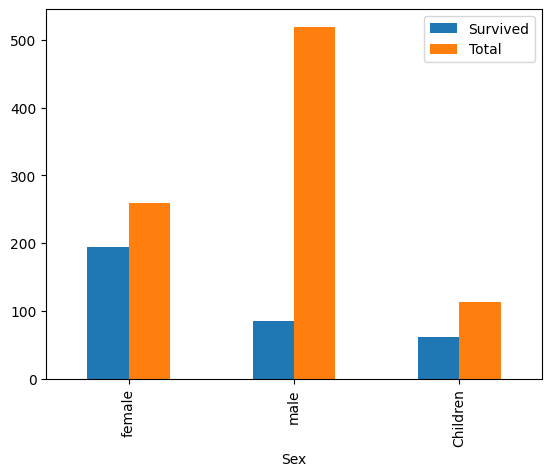

In [67]:
(survivors_df - survivors_children).plot(kind="bar");

## Big families

❓ Find out if it was harder for bigger families to survive?
  
Here you create a new column in your `DataFrame` for the family size of the passenger.

In [68]:
# YOUR CODE HERE
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [69]:
titanic_df["family_size"] = titanic_df["SibSp"] + titanic_df["Parch"]
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [75]:
titanic_df.groupby("family_size")[["Survived"]].mean().sort_values(by="Survived", ascending=False)

,Survived
family_size,
3,0.724138
2,0.578431
1,0.552795
6,0.333333
0,0.303538
4,0.200000
5,0.136364
7,0.000000
10,0.000000


In [76]:
titanic_df.groupby("Survived")[["family_size"]].mean()

,family_size
Survived,
0,0.883424
1,0.938596


## Distinguished titles

❓ Were passengers with distinguished titles preferred during the evacuation?
   
With some string manipulation, create a new column for each user with their title

In [95]:
# YOUR CODE HERE

# df2 = df.apply(lambda x : x + 10)
titanic_df["Title"] = titanic_df["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,3,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,Mr


In [99]:
title_df = titanic_df.groupby("Title")[["Survived"]].mean().sort_values(by="Survived", ascending=False)
title_df["Total"] = titanic_df.groupby("Title")[["Survived"]].count()

In [100]:
title_df

,Survived,Total
Title,,
the Countess,1.000000,1
Mlle,1.000000,2
Sir,1.000000,1
Ms,1.000000,1
Lady,1.000000,1
Mme,1.000000,1
Mrs,0.792000,125
Miss,0.697802,182
Master,0.575000,40
